In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the insurance.csv data file.
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

Number of rows: 1338   Number of columns: 7


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
 df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no null values present in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the results from info, we see that there are no null values in the data and the different data types of the columns



In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
for i in df.columns:
    print (df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

<AxesSubplot:>

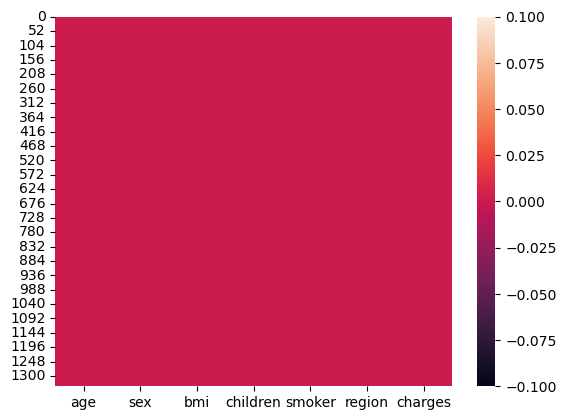

In [11]:
sns.heatmap(df.isnull())

# SEPARATE NUMERIC AND CATEGORICAL COLUMNS

In [13]:
categoric_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categoric_col.append(i)
print("categoric col:",categoric_col)
print("\n")


numeric_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numeric_col.append(i)
print("numeric col:",numeric_col)
print("\n")
        
        

categoric col: ['sex', 'smoker', 'region']


numeric col: ['age', 'bmi', 'children', 'charges']




separate numeric columns and categorical columns

# DESCRIBE

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on the results from describe, there seems to be a data that are categorical in nature, but are assigned as integer/float data type.


# DISTRIBUTION

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

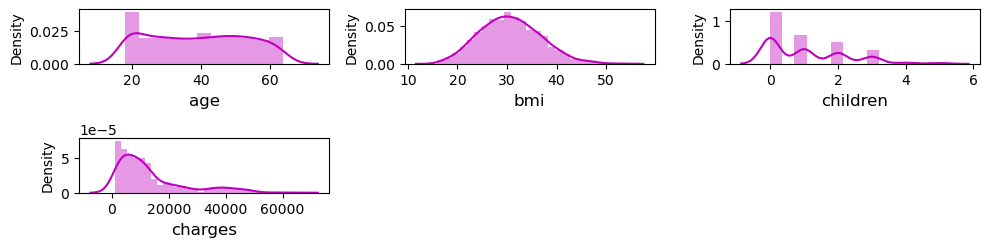

In [15]:
plt.figure(figsize=(10,6),facecolor= "white")
plotnumper = 1
for i in numeric_col:
    if plotnumper<=12:
        plt.subplot(5,3,plotnumper)
        sns.distplot(df[i],color = 'm')
        plt.xlabel(i,fontsize = 12)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumper+=1
plt.tight_layout()    

1. The distribution of the numeric columns is skewed to the right, so we applied natural log for ~ normal distribution.



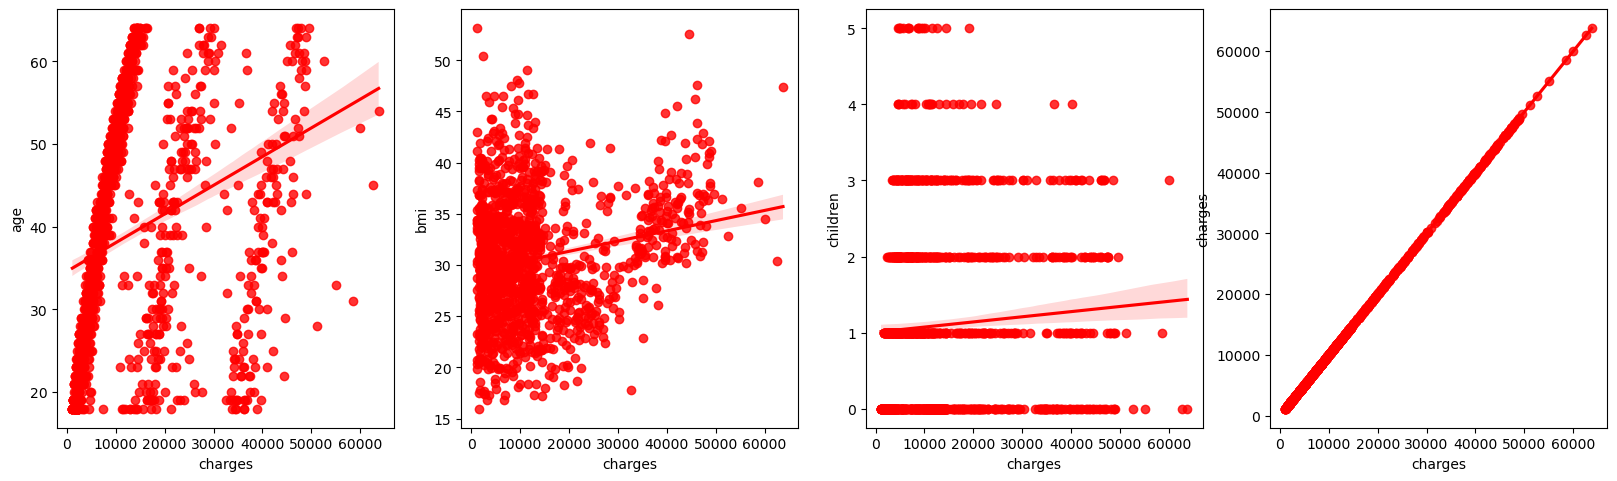

In [19]:
plt.figure(figsize=(20,25))
p=1
for i in numeric_col:
    if p<=17:
        plt.subplot(4,4,p)
        sns.regplot(x="charges",y=i,data=df,color="r")
        plt.xlabel("charges")
        plt.ylabel(i)
    p+=1
plt.show()    

Based on the analysis,

We know that smoking has a great impact on medical costs.
Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking

# OUTLIERS

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\si

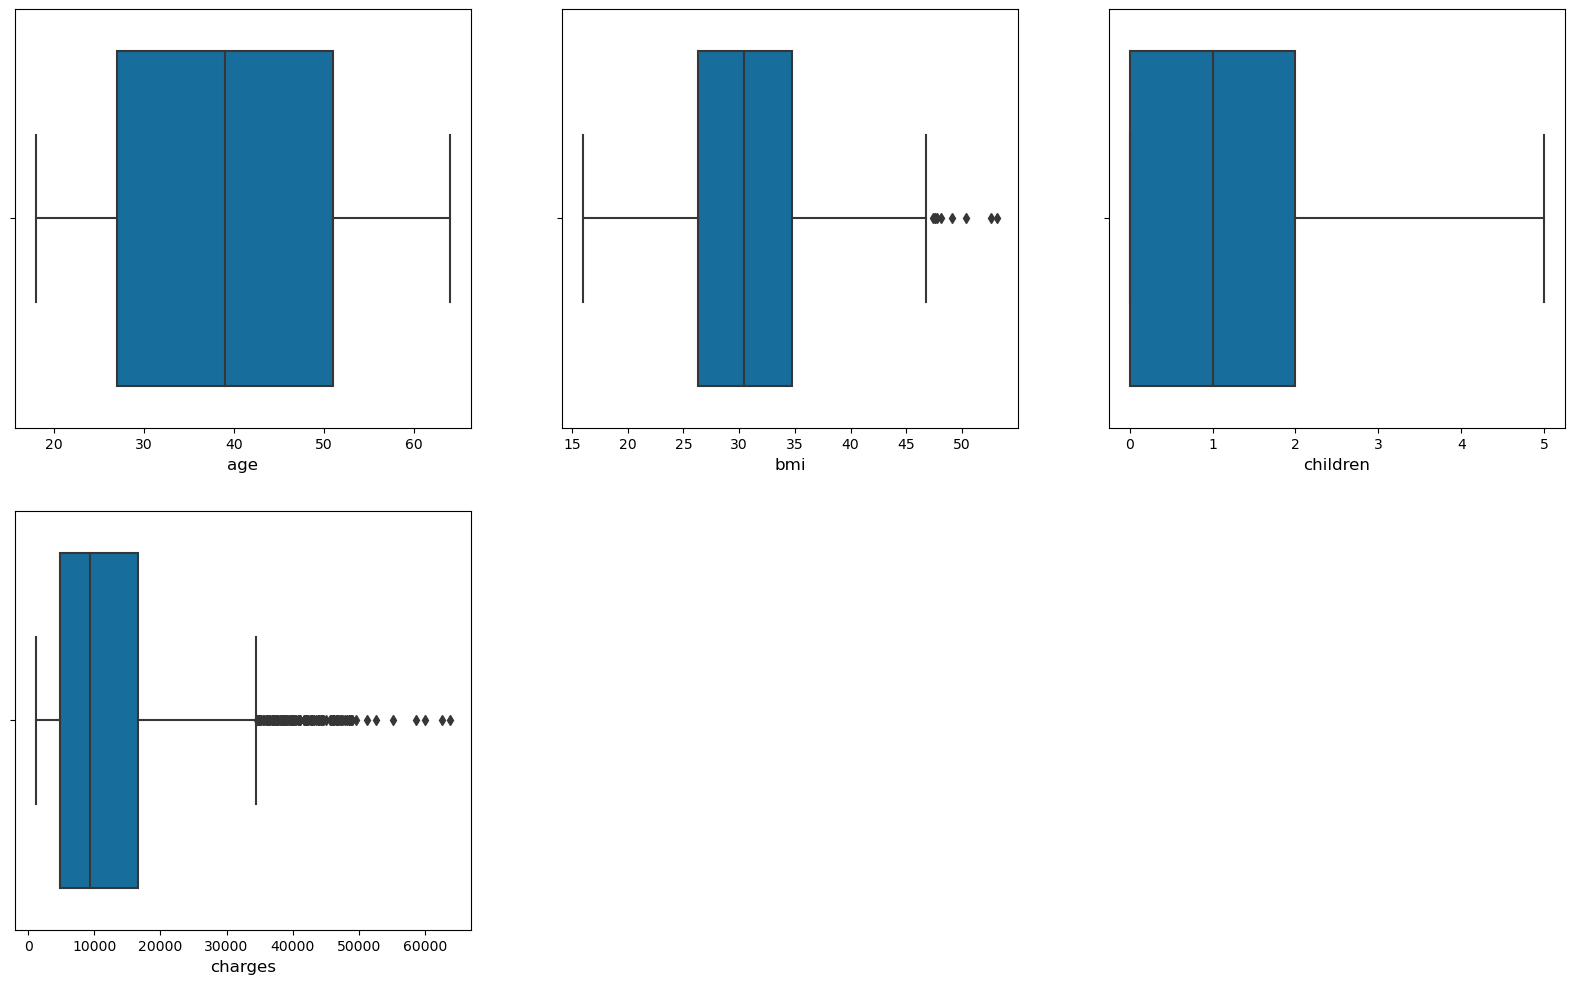

In [21]:
plt.figure(figsize=(20,25))
p=1
for i in numeric_col:
    if p<=17:
        ax=plt.subplot(4,3,p)
        sns.boxplot(df[i],palette="colorblind")
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=12)
    p+=1
plt.show()    

In [ ]:
Based on the box plots above, we can derive some inferences on the categorical variables:

Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.
Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.
Gender: The data is a little bit biased towards males as the interquartile range for male is higher compare to that for female. The data representation for male to female is 50.5 to 49.5.
Smoking behavior: Approximately 21% of our data comprises of smokers. The median is high for smokers, in comparison to those that do not smoke.
Now that we have looked at the effect of individual variables on medical charges, let's look at effect of a combination of factors on medical charges.



# SKEWNESS

In [23]:
df.skew()

C:\Users\nandh\AppData\Local\Temp\ipykernel_10304\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

there is no skewness in numeric columns,so we don't need to remove the skewness

In [25]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))

df


,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


categorical columns changed into numeric values by using OrdinalEncoder

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [27]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# CORRELATION

To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap.

In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.

In [28]:
cor=df.corr()

In [29]:
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


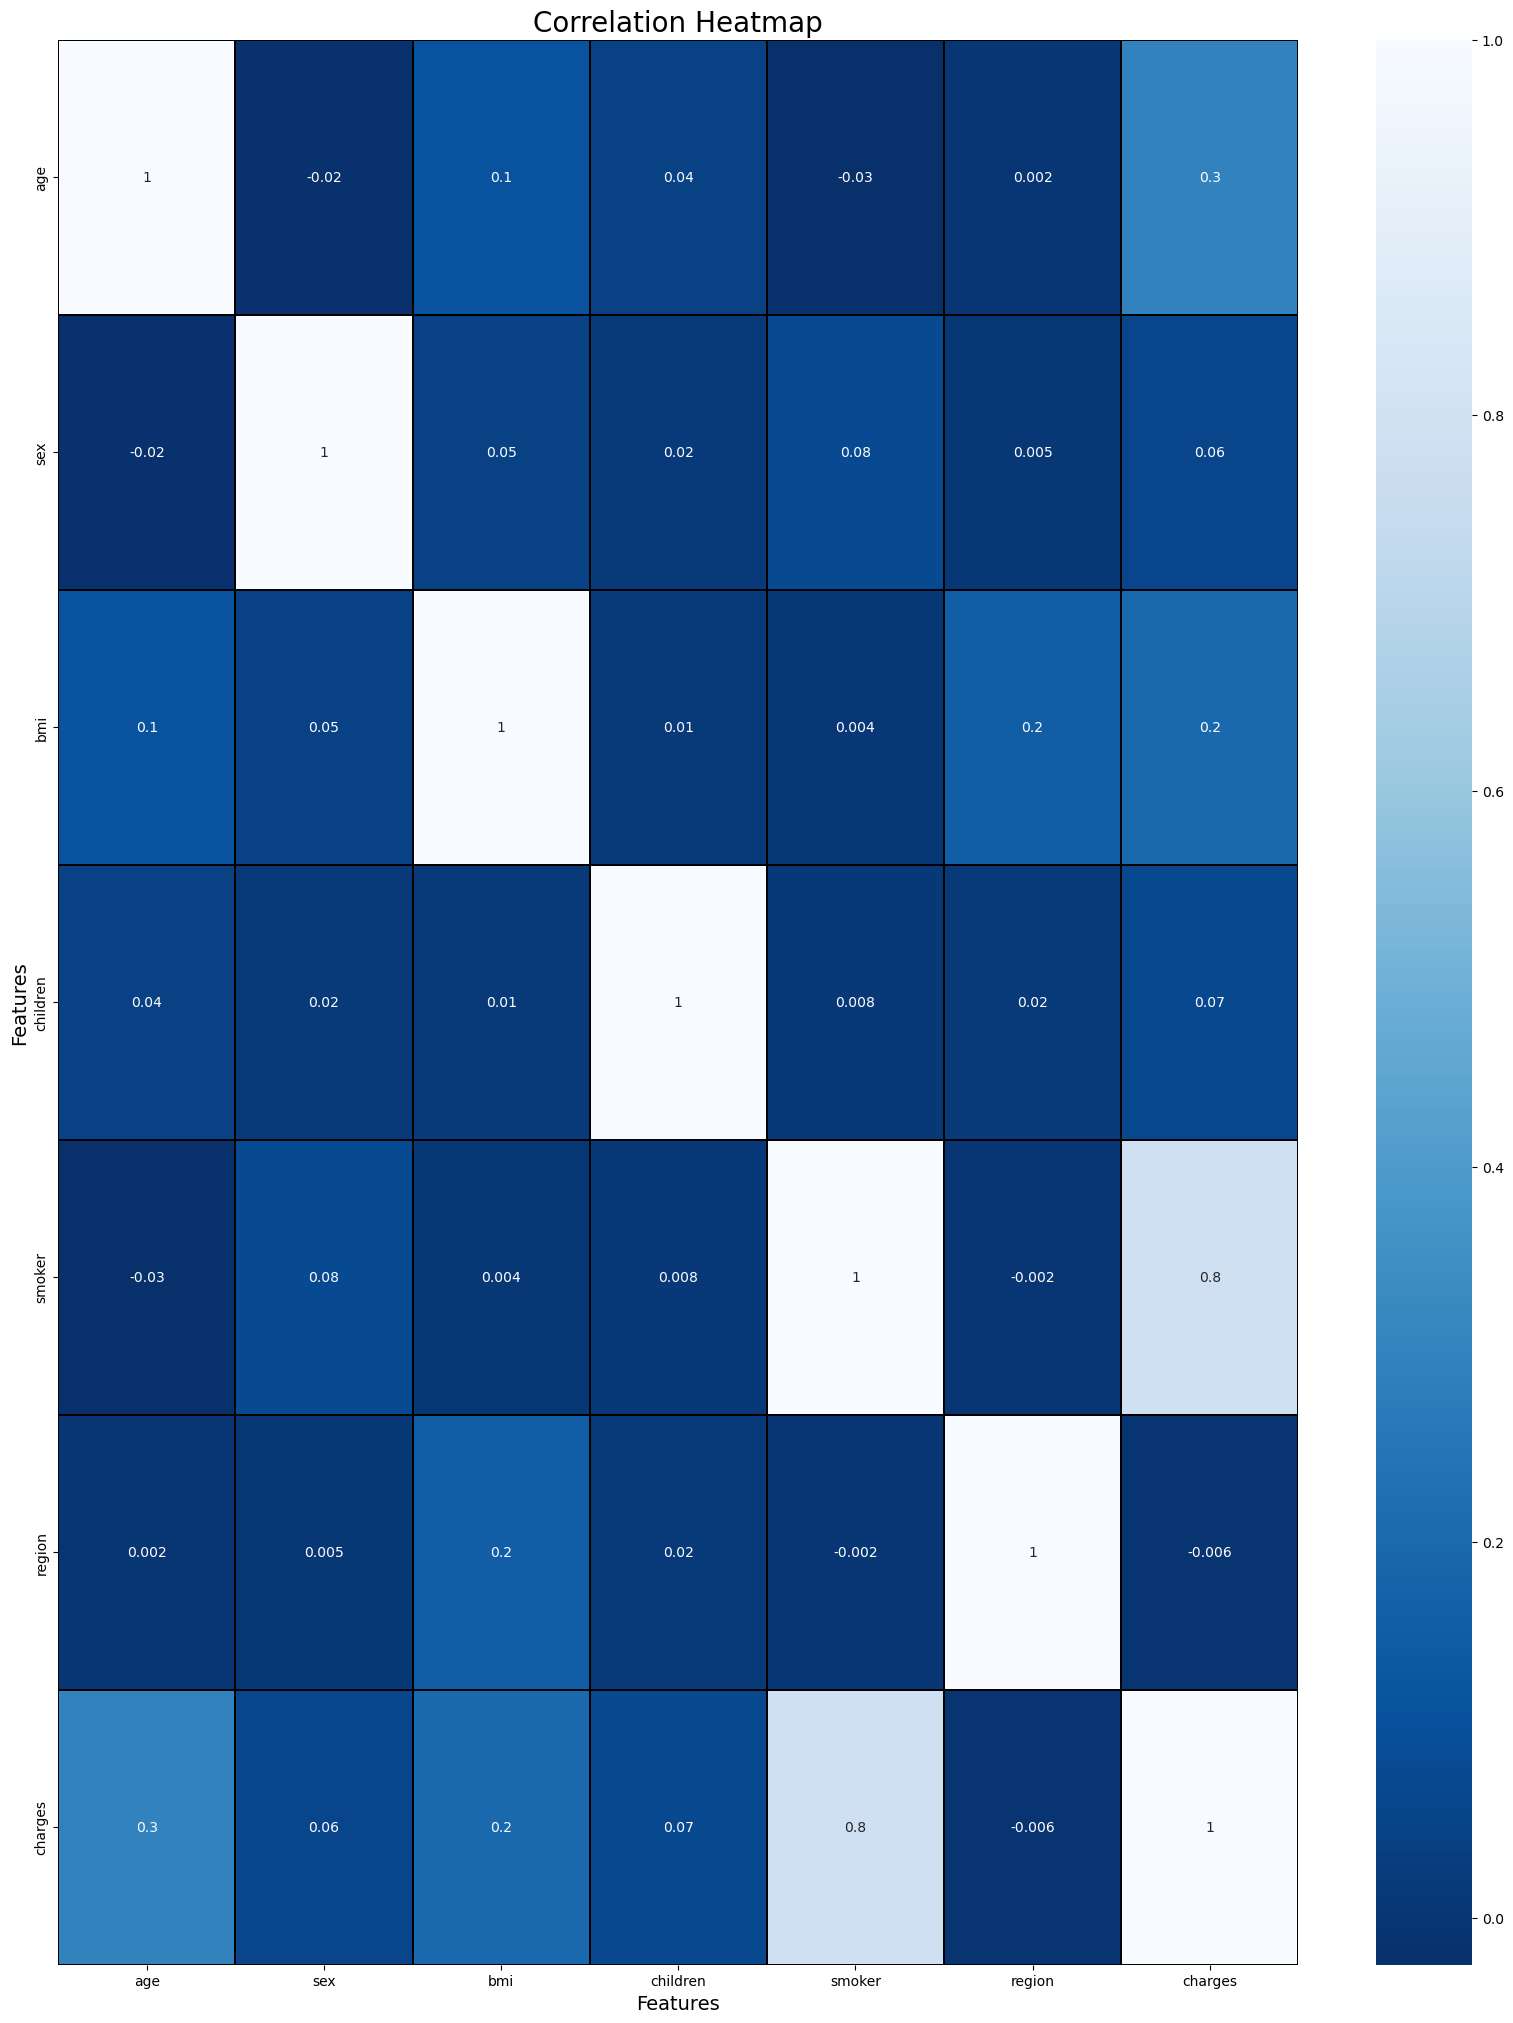

In [31]:
plt.figure(figsize=(20, 25))
sns.heatmap(df.corr(), annot=True, fmt='.1g', linewidth=0.2, linecolor='black', cmap='Blues_r')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).
This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges

In [33]:
cor["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

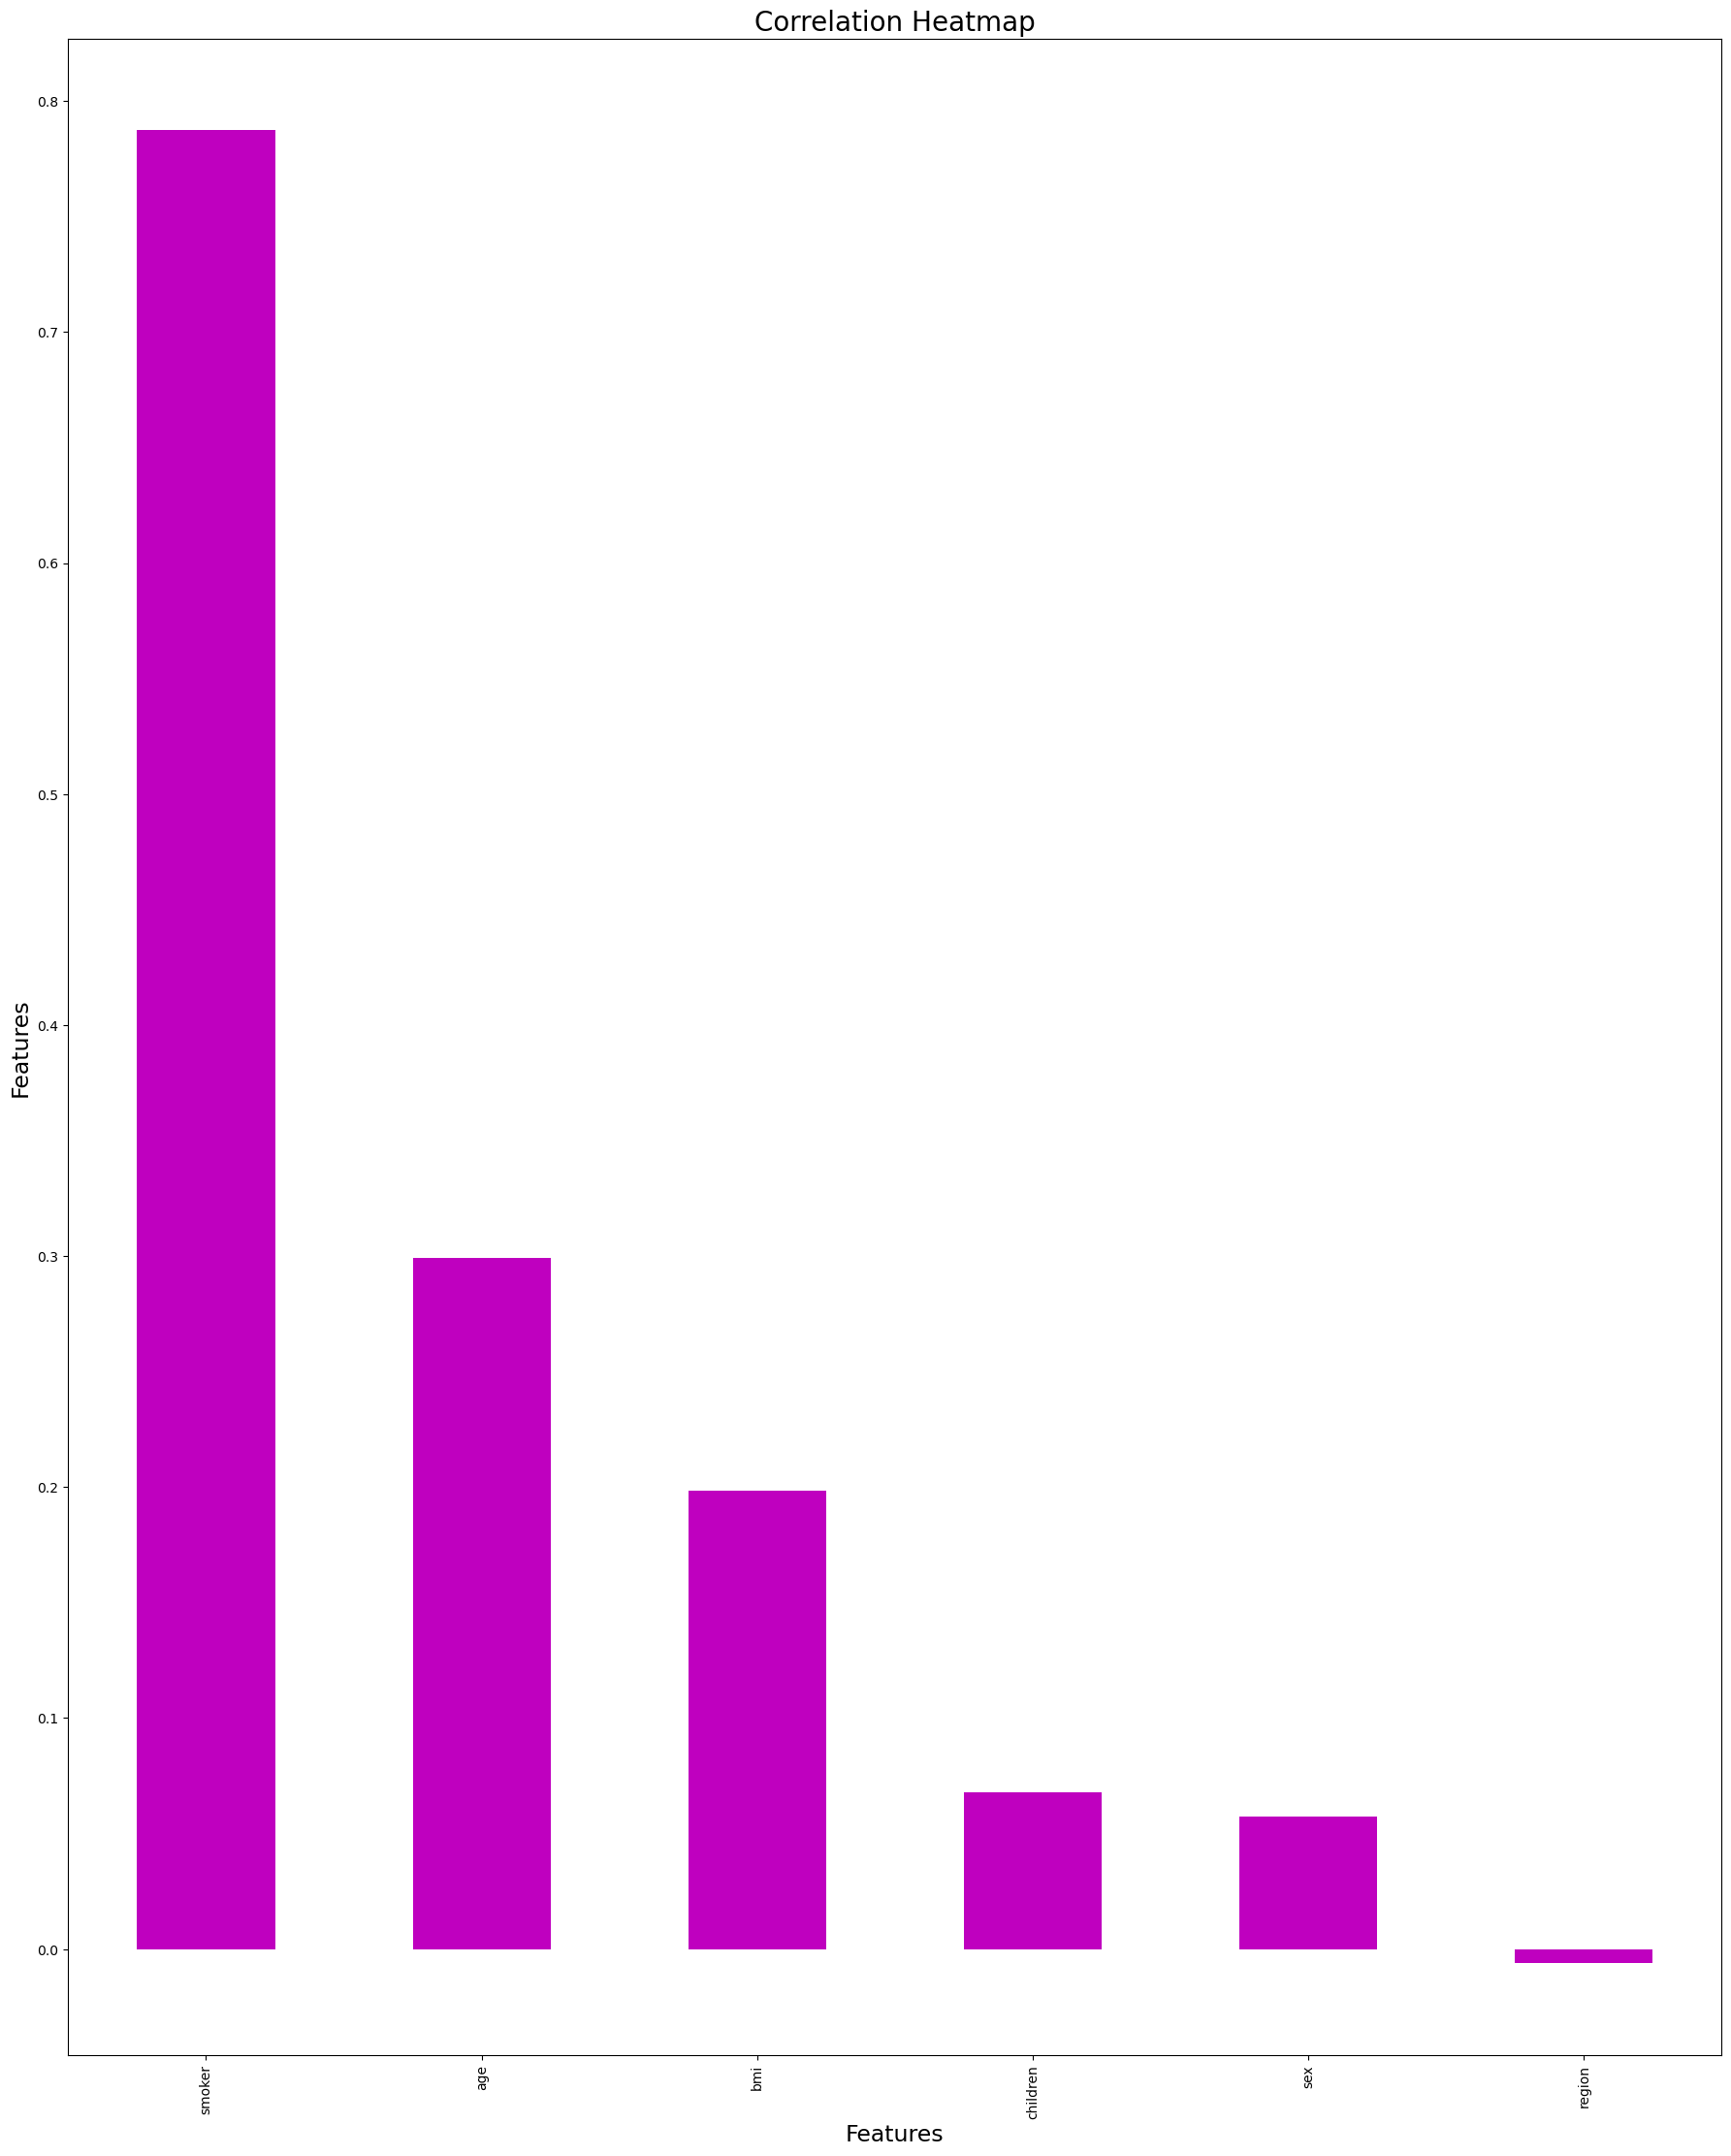

In [34]:
plt.figure(figsize=(22, 27))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color="m")
plt.xlabel('Features', fontsize=17)
plt.ylabel('Features', fontsize=17)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# Preparing Data for Machine Learning


In [35]:
x=df.drop("charges",axis=1)
y=df["charges"]


Now that we understand our dataset, it is time to apply machine learning methods to predict future insurance cost of patients based on several factors.

First, we have to prepare our data by splitting it into training and testing data.

In [36]:
print("features dimension",x.shape)
print("label dimension",y.shape)

features dimension (1338, 6)
label dimension (1338,)


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


# VIF-=(variance_inflation_factor)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [41]:
y.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

# Machine Learning

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso







#import libraries

The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables. We will use the following algorithms -

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    LR = LinearRegression()  
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred) 
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print("Best r2 accuracy is:", maxAccu, "at random_state", maxRs)


Best r2 accuracy is: 0.8041576323426197 at random_state 112


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)


In [63]:
LR = LinearRegression()  
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
r2_test = r2_score(y_test, pred_LR)
print("R-squared (Test):", r2_test)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_LR)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_LR)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.8041576323426197
R-squared (Training): 72.53763959645671
Mean Absolute Error: 3916.5692655615812
Mean Squared Error: 29880673.55564114
Root Mean Squared Error: 5466.321757419804


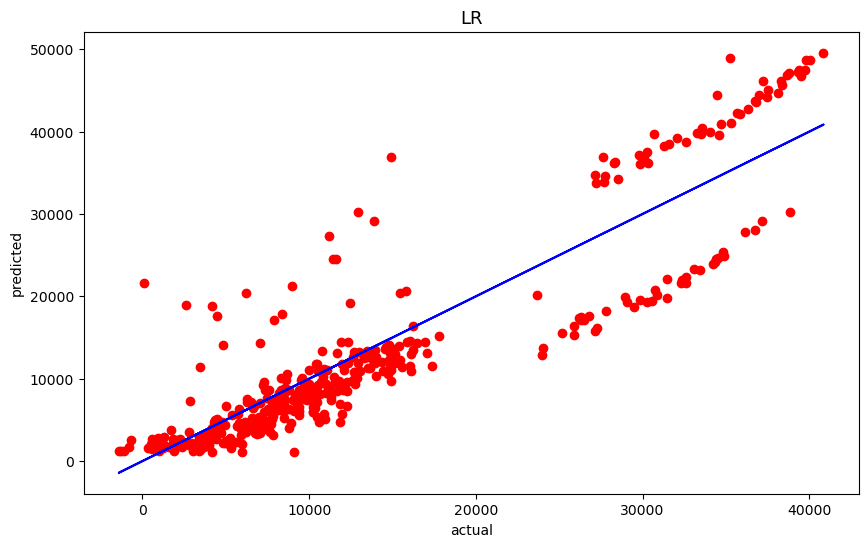

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color="r")
plt.plot(pred_LR,pred_LR,color="b")
plt.xlabel("actual",fontsize=10)
plt.ylabel("predicted",fontsize=10)
plt.title("LR",fontsize=13)
plt.show()




In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

RFR = RandomForestRegressor(n_estimators=100)  # You can adjust the number of estimators as needed
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

r2_test = r2_score(y_test, pred_RFR)
print("R-squared (Test):", r2_test)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_RFR)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_RFR)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.895954731502168
R-squared (Training): 97.18242682781712
Mean Absolute Error: 2297.3370998674427
Mean Squared Error: 15874719.756410139
Root Mean Squared Error: 3984.309194378636


In [72]:

KNN = KNeighborsRegressor(n_neighbors=k)
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)

r2_test = r2_score(y_test, pred_KNN)
print("R-squared (Test):", r2_test)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_KNN)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_KNN)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.8563501742148685
R-squared (Training): 85.85323135123244
Mean Absolute Error: 3017.257427708955
Mean Squared Error: 21917390.0007151
Root Mean Squared Error: 4681.6012218807255


In [74]:
GBR=GradientBoostingRegressor
GBR = KNeighborsRegressor(n_neighbors=k)
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)

r2_test = r2_score(y_test, pred_GBR)
print("R-squared (Test):", r2_test)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_GBR)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_GBR)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.8563501742148685
R-squared (Training): 85.85323135123244
Mean Absolute Error: 3017.257427708955
Mean Squared Error: 21917390.0007151
Root Mean Squared Error: 4681.6012218807255


In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
LS = Lasso()
LS.fit(x_train, y_train)
pred_LS = LS.predict(x_test)
pred_train = LS.predict(x_train)

r2_test = r2_score(y_test, pred_LS)
print("R-squared (Test):", r2_test)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_LS)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_LS)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.8041654365641747
R-squared (Training): 72.53763490441396
Mean Absolute Error: 3916.4118419810015
Mean Squared Error: 29879482.82556864
Root Mean Squared Error: 5466.212841224593


In [78]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
RD = Ridge()
RD.fit(x_train, y_train)
pred_RD = RD.predict(x_test)
pred_train = RD.predict(x_train)

r2_test = r2_score(y_test, pred_RD)
print("R-squared (Test):", r2_test)
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

RD = Ridge()
RD.fit(x_train, y_train)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_RD)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_RD)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



R-squared (Test): 0.80415776793707
R-squared (Training): 72.53754715329913
Mean Absolute Error: 3918.2178490667775
Mean Squared Error: 29880652.86730107
Root Mean Squared Error: 5466.319865073857


In [80]:
ETC = ExtraTreesRegressor()
ETC.fit(x_train, y_train)
pred_ETC = ETC.predict(x_test)
pred_train = ETC.predict(x_train)

r2_test = r2_score(y_test, pred_ETC)
print("R-squared (Test):", r2_test)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_ETC)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_ETC)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.8745105720081499
R-squared (Training): 99.86401505730052
Mean Absolute Error: 2393.1434690011197
Mean Squared Error: 19146565.053117618
Root Mean Squared Error: 4375.67881055244


In [84]:
DTC = DecisionTreeRegressor()
DTC.fit(x_train, y_train)
pred_DTC = DTC.predict(x_test)
pred_train = DTC.predict(x_train)

r2_test = r2_score(y_test, pred_DTC)
print("R-squared (Test):", r2_test)

r2_train = r2_score(y_train, pred_train)
print("R-squared (Training):", r2_train * 100)

mae = mean_absolute_error(y_test, pred_DTC)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred_DTC)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.8069674321182
R-squared (Training): 99.86401505730052
Mean Absolute Error: 2297.630240495025
Mean Squared Error: 29451968.006095752
Root Mean Squared Error: 5426.966740831913


Based on the feature importances, we can see that the sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual. Therefore, we can eliminate those variables and generate another model to predict the insurance cost without accounting for those variables. We are only choosing 2 lowest contributing variables to eliminate because it would not be accurate to remove too many potentially unimportant independent variables when generating a model.

# CROSS VALIDATION

In [85]:
from sklearn.model_selection import cross_val_score

In [87]:
score=cross_val_score(LR,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
difference b/w r2 and cross validation: 5.69016849845243


In [88]:
score=cross_val_score(RFR,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.85440681 0.78223211 0.86767157 0.82855853 0.85470171]
0.837514146267524
difference b/w r2 and cross validation: 5.844058523464401


In [89]:
score=cross_val_score(KNN,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_KNN)-score.mean())*100)

[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
difference b/w r2 and cross validation: 5.011787834163983


In [91]:
score=cross_val_score(DTC,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_DTC)-score.mean())*100)

[0.76213155 0.68663144 0.74118249 0.70383622 0.66730502]
0.7122173457562839
difference b/w r2 and cross validation: 9.475008636191607


In [92]:
score=cross_val_score(LS,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_LS)-score.mean())*100)

[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
difference b/w r2 and cross validation: 5.690450162674498


In [93]:
score=cross_val_score(RD,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_RD)-score.mean())*100)

[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582405
difference b/w r2 and cross validation: 5.689691777882944


In [94]:
score=cross_val_score(GBR,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
difference b/w r2 and cross validation: 5.011787834163983


In [95]:
score=cross_val_score(ETC,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("difference b/w r2 and cross validation:",(r2_score(y_test,pred_ETC)-score.mean())*100)

[0.83328668 0.74819834 0.85361941 0.81171353 0.84561066]
0.8184857242337784
difference b/w r2 and cross validation: 5.862830386924134


after cross validate the data test my observation RFR is the best model

# HYPER PARAMETER TUNING

In [96]:
from sklearn.model_selection import GridSearchCV

In [106]:
RFR = RandomForestRegressor()

parameters = [{"max_depth": [2, 3, 4, 5, 6],
                           "n_estimators": [400, 500, 600]}]  

gscv = GridSearchCV(RFR, 
                    parameters,
                    cv = 5,
                    n_jobs = -1)
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [400, 500, 600]}])

In [107]:
gscv.best_params_

{'max_depth': 4, 'n_estimators': 600}

In [115]:
model=RandomForestRegressor(max_depth= 4, n_estimators= 600)

In [116]:
model.fit(x_train, y_train)
pred= model.predict(x_test)

r2_test = r2_score(y_test, pred)
print("R-squared (Test):", r2_test)

mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared (Test): 0.913458177380235
Mean Absolute Error: 2265.4665821084695
Mean Squared Error: 13204129.328825269
Root Mean Squared Error: 3633.748660656825


# SAVED MODEL

In [119]:
import joblib
import pickle 
filename='redwine.pkl'
pickle.dump(model,open(filename,"wb"))


In [120]:
loaded_model=pickle.load(open('redwine.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)


91.3458177380235


In [121]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","originals"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
predicted,12618.436398,7770.450741,36030.197288,25580.54240,24009.382559,7764.639608,8394.177543,20787.190701,6479.365206,5448.026803,...,6681.34401,38712.358261,13939.046077,8200.821612,11520.536424,6699.594627,6371.879172,9204.013712,3819.264537,3799.856985
originals,11090.717800,8017.061150,34617.840650,24535.69855,23967.383050,8059.679100,8252.284300,20745.989100,5253.524000,1719.436300,...,7046.72220,36307.798300,13415.038100,6402.291350,9866.304850,5972.378000,5245.226900,6948.700800,2680.949300,1969.614000
